In [1]:
import pandas as pd

# Load full dataset
df = pd.read_csv(r"C:\Users\Admin\data\IMDB Dataset.csv")

# Take a random sample of 6000 rows (maintaining class balance)
df_sample = df.groupby('sentiment', group_keys=False).apply(lambda x: x.sample(3000, random_state=42))

# Check size and class distribution
print(df_sample.shape)
print(df_sample['sentiment'].value_counts())

# Save sampled dataset for re-use (optional)
df_sample.to_csv(r"C:\Users\Admin\data\IMDB_small.csv", index=False)


C:\Users\Admin\AppData\Local\Temp\ipykernel_16968\2053647378.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = df.groupby('sentiment', group_keys=False).apply(lambda x: x.sample(3000, random_state=42))


(6000, 2)
sentiment
negative    3000
positive    3000
Name: count, dtype: int64


In [ ]:
# =========================
# 1. Import Libraries
# =========================
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Download stopwords (only needed once)
nltk.download('stopwords')

# =========================
# 2. Load Dataset
# =========================
df = pd.read_csv(r"data/IMDB_small.csv")

# Inspect dataset
print("Dataset shape:", df.shape)
print(df.head())
print("\nClass distribution:\n", df['sentiment'].value_counts())

# =========================
# 3. Data Cleaning / Preprocessing
# =========================
# Remove duplicates and missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Clean text function
def clean_text(text):
    text = re.sub('<.*?>', '', text)       # remove HTML
    text = re.sub('[^a-zA-Z]', ' ', text)  # remove punctuation/numbers
    text = text.lower()                    # lowercase
    text = ' '.join([w for w in text.split() if w not in stopwords.words('english')])
    return text

df['review'] = df['review'].apply(clean_text)

# Encode target variable
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# =========================
# 4. Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment']
)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# =========================
# 5. Feature Engineering (TF-IDF)
# =========================
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print("TF-IDF feature shape:", X_train_tfidf.shape)

# =========================
# 6. Train Traditional Model (Logistic Regression)
# =========================
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# =========================
# 7. Predictions
# =========================
y_pred = lr_model.predict(X_test_tfidf)

# =========================
# 8. Evaluation
# =========================
acc = accuracy_score(y_test, y_pred)
print("\nModel Evaluation Results")
print("========================")
print("Accuracy:", round(acc, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (IMDB)')
plt.show()

# =========================
# 9. Feature Importance (Explainability)
# =========================
feature_names = vectorizer.get_feature_names_out()
sorted_features = sorted(zip(lr_model.coef_[0], feature_names))

top_negative = sorted_features[:10]
top_positive = sorted_features[-10:]

print("\nTop Positive Words (most indicative of positive reviews):")
for coef, word in reversed(top_positive):
    print(f"{word}: {coef:.4f}")

print("\nTop Negative Words (most indicative of negative reviews):")
for coef, word in top_negative:
    print(f"{word}: {coef:.4f}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset shape: (6000, 2)
                                              review sentiment
0  I was looking forward to seeing Bruce Willis i...  negative
1  Bugs Bunny accidentally ends up at the South P...  negative
2  I find it difficult to comprehend what makes v...  negative
3  It's been said several times - not least by me...  negative
4  New rule. Nobody is allowed to make any more Z...  negative

Class distribution:
 sentiment
negative    3000
positive    3000
Name: count, dtype: int64


In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

nltk.download('stopwords')

# Load sampled dataset
df = pd.read_csv(r"data/IMDB_small.csv")

# Quick check
print(df.shape)
print(df['sentiment'].value_counts())

# Clean text (optimized)
stop = set(stopwords.words('english'))
def clean_text(text):
    text = re.sub('<.*?>', '', text)       # remove HTML
    text = re.sub('[^a-zA-Z]', ' ', text)  # keep only letters
    text = text.lower()
    return ' '.join([w for w in text.split() if w not in stop])

df['review'] = df['review'].astype(str).apply(clean_text)
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0})

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment']
)

# TF-IDF (reduced for speed)
vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(


SyntaxError: incomplete input (2493170655.py, line 38)

In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

nltk.download('stopwords')

# Load sampled dataset
df = pd.read_csv(r"data/IMDB_small.csv")

# Quick check
print(df.shape)
print(df['sentiment'].value_counts())

# Clean text (optimized)
stop = set(stopwords.words('english'))
def clean_text(text):
    text = re.sub('<.*?>', '', text)       # remove HTML
    text = re.sub('[^a-zA-Z]', ' ', text)  # keep only letters
    text = text.lower()
    return ' '.join([w for w in text.split() if w not in stop])

df['review'] = df['review'].astype(str).apply(clean_text)
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0})

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment']
)

# TF-IDF (reduced for speed)
vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train logistic regression
lr = LogisticRegression(max_iter=500)
lr.fit(X_train_tfidf, y_train)

# Evaluate
y_pred = lr.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(6000, 2)
sentiment
negative    3000
positive    3000
Name: count, dtype: int64
Accuracy: 0.8641666666666666
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       600
           1       0.85      0.88      0.87       600

    accuracy                           0.86      1200
   macro avg       0.86      0.86      0.86      1200
weighted avg       0.86      0.86      0.86      1200



Dataset shape: (6000, 2)

First 5 rows:
                                               review sentiment
0  I was looking forward to seeing Bruce Willis i...  negative
1  Bugs Bunny accidentally ends up at the South P...  negative
2  I find it difficult to comprehend what makes v...  negative
3  It's been said several times - not least by me...  negative
4  New rule. Nobody is allowed to make any more Z...  negative

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     6000 non-null   object
 1   sentiment  6000 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB
None

Number of duplicates: 2

Missing values:
 review       0
sentiment    0
dtype: int64

New shape after removing duplicates: (5998, 2)

Class distribution:
 sentiment
negative    2999
positive    2999
Name: count, dtype: int64


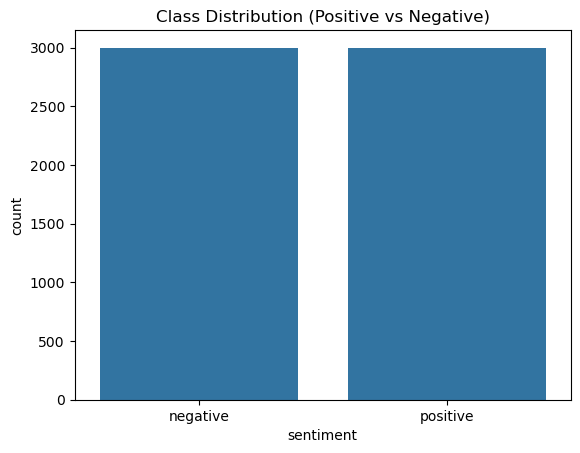

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"data/IMDB_small.csv")

# Initial overview
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nData info:")
print(df.info())

# Check duplicates and missing values
print("\nNumber of duplicates:", df.duplicated().sum())
print("\nMissing values:\n", df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)
print("\nNew shape after removing duplicates:", df.shape)

# Check class distribution
print("\nClass distribution:\n", df['sentiment'].value_counts())

# Plot class distribution
sns.countplot(x='sentiment', data=df)
plt.title("Class Distribution (Positive vs Negative)")
plt.show()


count    5998.000000
mean      229.854952
std       171.220731
min        12.000000
25%       126.000000
50%       170.000000
75%       282.000000
max      1522.000000
Name: review_length, dtype: float64


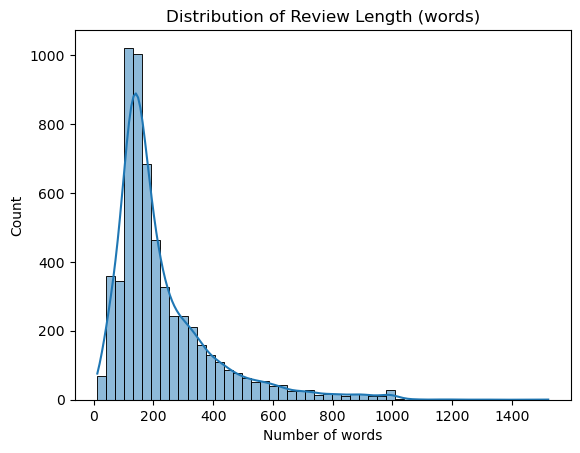

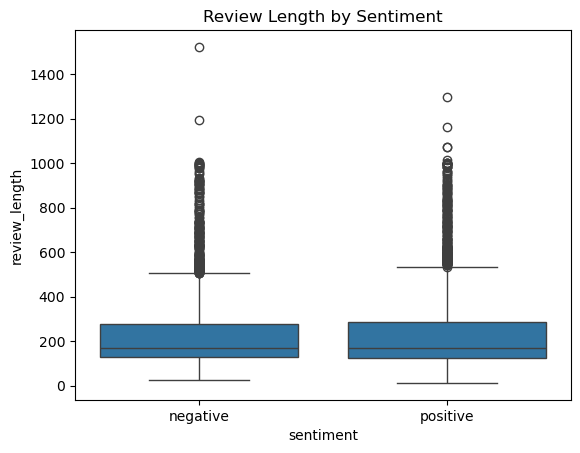

In [7]:
# Review length analysis
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))

# Summary stats
print(df['review_length'].describe())

# Plot review length distribution
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribution of Review Length (words)")
plt.xlabel("Number of words")
plt.show()

# Compare review length by sentiment
sns.boxplot(x='sentiment', y='review_length', data=df)
plt.title("Review Length by Sentiment")
plt.show()


In [11]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub('<.*?>', '', str(text))        # remove HTML
    text = re.sub('[^a-zA-Z]', ' ', text)       # keep letters only
    text = text.lower()                          # lowercase
    return ' '.join([w for w in text.split() if w not in stop])

df['clean_review'] = df['review'].apply(clean_text)

# Encode sentiment
df['sentiment_label'] = df['sentiment'].map({'positive':1, 'negative':0})


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# TF-IDF
vectorizer = TfidfVectorizer(max_features=2000)
X_text = vectorizer.fit_transform(df['clean_review'])

# Add review length as a feature
import numpy as np
X_extra = np.array(df['review_length']).reshape(-1,1)

# Combine sparse TF-IDF with numeric feature
X = hstack([X_text, X_extra])
y = df['sentiment_label']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset shape: (6000, 2)

First 5 rows:
                                               review sentiment
0  I was looking forward to seeing Bruce Willis i...  negative
1  Bugs Bunny accidentally ends up at the South P...  negative
2  I find it difficult to comprehend what makes v...  negative
3  It's been said several times - not least by me...  negative
4  New rule. Nobody is allowed to make any more Z...  negative

Class distribution:
 sentiment
negative    3000
positive    3000
Name: count, dtype: int64

New shape after removing duplicates/missing values: (5998, 2)

Review length stats:
count    5998.000000
mean      117.461821
std        89.195151
min         7.000000
25%        63.000000
50%        87.000000
75%       145.000000
max       811.000000
Name: review_length, dtype: float64


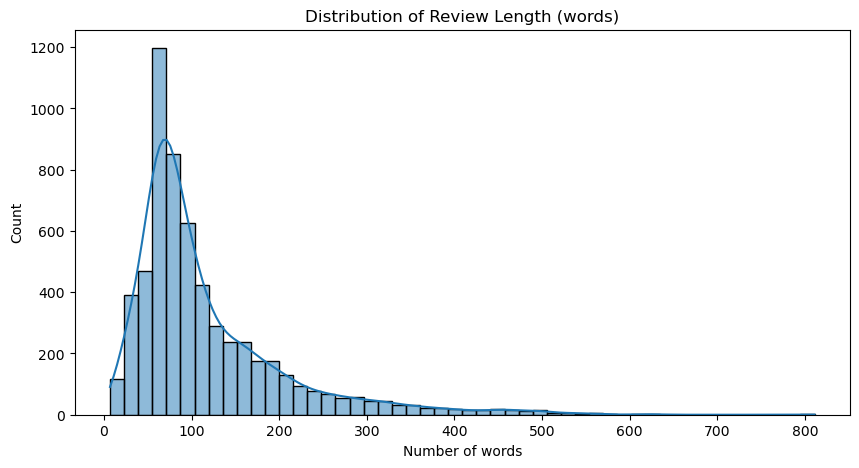

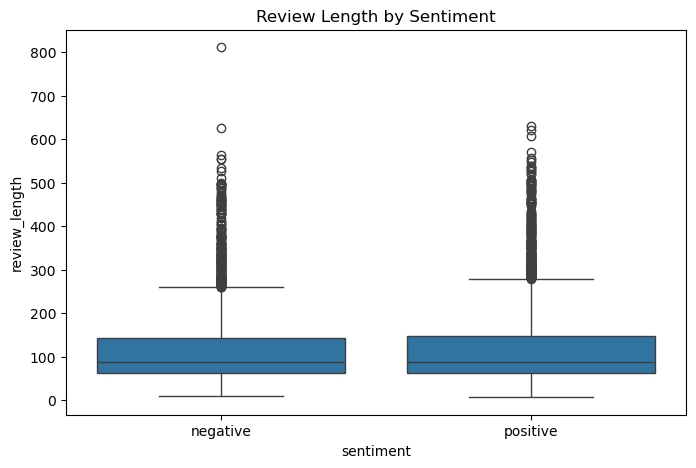


Training samples: 4798, Testing samples: 1200

Accuracy: 0.8633

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       600
           1       0.86      0.88      0.86       600

    accuracy                           0.86      1200
   macro avg       0.86      0.86      0.86      1200
weighted avg       0.86      0.86      0.86      1200



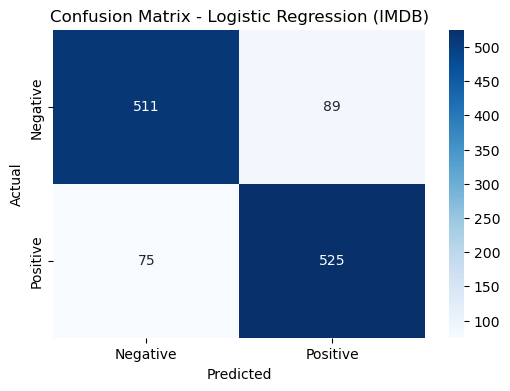


Top Positive Words (most indicative of positive reviews):
great: 4.5827
excellent: 3.3029
best: 2.9851
perfect: 2.7200
wonderful: 2.4608
love: 2.3851
brilliant: 2.3484
amazing: 2.2470
always: 2.2353
loved: 2.2309

Top Negative Words (most indicative of negative reviews):
worst: -4.6590
bad: -4.5850
waste: -3.3582
poor: -3.2951
awful: -3.1818
nothing: -2.9563
terrible: -2.8986
boring: -2.7194
minutes: -2.5502
dull: -2.5390


In [21]:
# =========================
# 1. Import Libraries
# =========================
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.sparse import hstack

# Download stopwords
nltk.download('stopwords')

# =========================
# 2. Load Dataset
# =========================
df = pd.read_csv(r"data/IMDB_small.csv")

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nClass distribution:\n", df['sentiment'].value_counts())

# =========================
# 3. Data Cleaning / Preprocessing
# =========================
# Remove duplicates and missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print("\nNew shape after removing duplicates/missing values:", df.shape)

# Clean text
stop = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub('<.*?>', '', str(text))         # remove HTML
    text = re.sub('[^a-zA-Z]', ' ', text)        # keep letters only
    text = text.lower()
    return ' '.join([w for w in text.split() if w not in stop])

df['clean_review'] = df['review'].apply(clean_text)

# Encode sentiment
df['sentiment_label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# =========================
# 4. EDA: Review Length Analysis
# =========================
df['review_length'] = df['clean_review'].apply(lambda x: len(str(x).split()))

print("\nReview length stats:")
print(df['review_length'].describe())

# Plot review length distribution
plt.figure(figsize=(10,5))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribution of Review Length (words)")
plt.xlabel("Number of words")
plt.show()

# Compare review length by sentiment
plt.figure(figsize=(8,5))
sns.boxplot(x='sentiment', y='review_length', data=df)
plt.title("Review Length by Sentiment")
plt.show()

# =========================
# 5. Feature Engineering
# =========================
# TF-IDF for text
vectorizer = TfidfVectorizer(max_features=2000)
X_text = vectorizer.fit_transform(df['clean_review'])

# Include review_length as a numeric feature
X_extra = np.array(df['review_length']).reshape(-1,1)

# Combine text and numeric feature
X = hstack([X_text, X_extra])
y = df['sentiment_label']

# =========================
# 6. Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTraining samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# =========================
# 7. Logistic Regression Model
# =========================
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)

# =========================
# 8. Predictions & Evaluation
# =========================
y_pred = lr_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy:", round(acc,4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (IMDB)')
plt.show()

# =========================
# 9. Model Explainability (Top Words)
# =========================
feature_names = vectorizer.get_feature_names_out()
sorted_features = sorted(zip(lr_model.coef_[0], feature_names))

top_negative = sorted_features[:10]
top_positive = sorted_features[-10:]

print("\nTop Positive Words (most indicative of positive reviews):")
for coef, word in reversed(top_positive):
    print(f"{word}: {coef:.4f}")

print("\nTop Negative Words (most indicative of negative reviews):")
for coef, word in top_negative:
    print(f"{word}: {coef:.4f}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Accuracy: 0.8633

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       600
           1       0.86      0.88      0.86       600

    accuracy                           0.86      1200
   macro avg       0.86      0.86      0.86      1200
weighted avg       0.86      0.86      0.86      1200



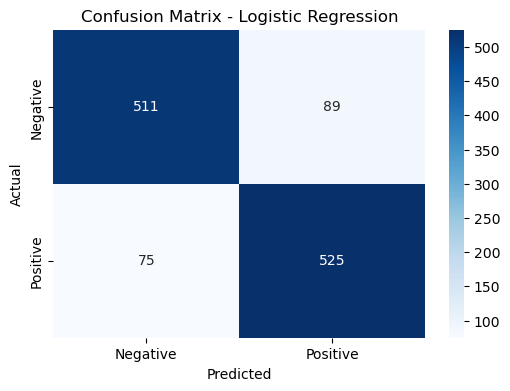

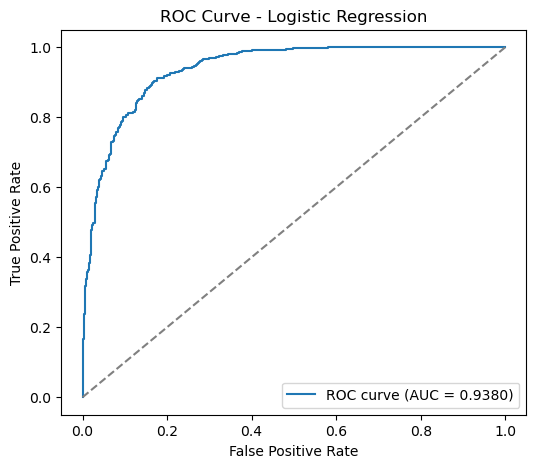

ROC-AUC Score: 0.938

Top Positive Words:
great: 4.5827
excellent: 3.3029
best: 2.9851
perfect: 2.7200
wonderful: 2.4608
love: 2.3851
brilliant: 2.3484
amazing: 2.2470
always: 2.2353
loved: 2.2309

Top Negative Words:
worst: -4.6590
bad: -4.5850
waste: -3.3582
poor: -3.2951
awful: -3.1818
nothing: -2.9563
terrible: -2.8986
boring: -2.7194
minutes: -2.5502
dull: -2.5390

Model, vectorizer, and evaluation scores saved in 'data/' folder.


In [23]:
# =========================
# 1. Import Libraries
# =========================
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from scipy.sparse import hstack
import joblib
import json

# Download stopwords
nltk.download('stopwords')

# =========================
# 2. Load Dataset
# =========================
df = pd.read_csv(r"data/IMDB_small.csv")

# Remove duplicates / missing
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# =========================
# 3. Preprocessing
# =========================
stop = set(stopwords.words('english'))
def clean_text(text):
    text = re.sub('<.*?>', '', str(text))         # remove HTML
    text = re.sub('[^a-zA-Z]', ' ', text)        # keep letters only
    text = text.lower()
    return ' '.join([w for w in text.split() if w not in stop])

df['clean_review'] = df['review'].apply(clean_text)
df['sentiment_label'] = df['sentiment'].map({'positive':1, 'negative':0})
df['review_length'] = df['clean_review'].apply(lambda x: len(str(x).split()))

# =========================
# 4. Feature Engineering
# =========================
vectorizer = TfidfVectorizer(max_features=2000) 
X_text = vectorizer.fit_transform(df['clean_review'])
X_extra = np.array(df['review_length']).reshape(-1,1)
X = hstack([X_text, X_extra])
y = df['sentiment_label']

# =========================
#
